In [54]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt
import joblib

In [55]:
df = pd.read_csv('preprocessed_data.csv')
df

,bedrooms,bathrooms,house_size,land_size,price,is_10_plus_bedrooms,is_10_plus_bathrooms,suburb_Angoda,suburb_Athurugiriya,suburb_Battaramulla,...,suburb_Malabe,suburb_Moratuwa,suburb_Mount Lavinia,suburb_Nawala,suburb_Nugegoda,suburb_Pannipitiya,suburb_Piliyandala,suburb_Rajagiriya,suburb_Ratmalana,suburb_Talawatugoda
0,4.0,2.0,1500.0,3.2,50000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,4.0,3000.0,10.0,200000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3.0,4.0,2000.0,12.0,200000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,1000.0,0.0,115000.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,3.0,3.0,1400.0,7.0,82500.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3460,4.0,4.0,2500.0,8.0,300000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3461,4.0,4.0,4900.0,10.0,300000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3462,5.0,4.0,4000.0,8.0,300000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3463,3.0,2.0,1400.0,12.0,100000.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


<Axes: >

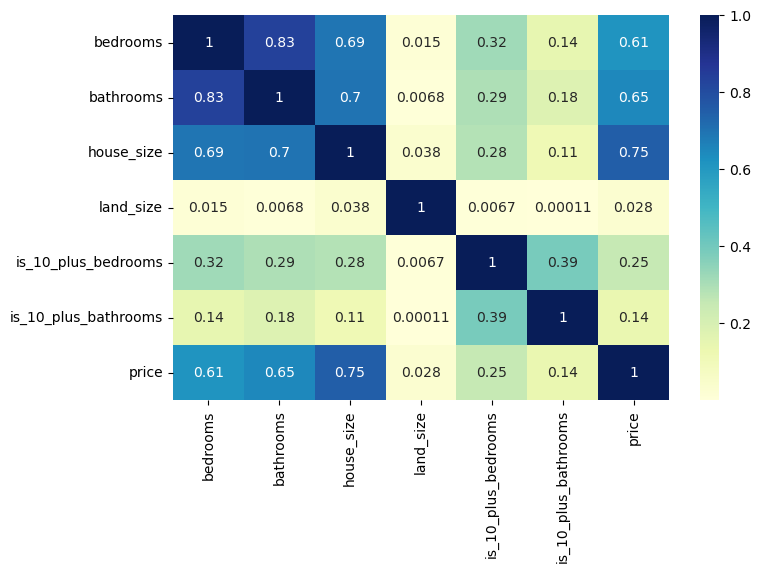

In [56]:
# Variable correlation heatmap

plt.figure(figsize = (8,5))
sns.heatmap(df[['bedrooms','bathrooms','house_size','land_size','is_10_plus_bedrooms','is_10_plus_bathrooms','price']].corr(), annot = True, cmap = 'YlGnBu')


In [57]:
x, y = df.drop('price', axis = 1), df['price']
x.shape, y.shape

((3465, 36), (3465,))

In [58]:
# train test split , 20% for testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 44)

In [59]:
x_train.shape, x_test.shape

((2772, 36), (693, 36))

### Finding Optimal Model

#### Linear

In [60]:
# Fitting LINEAR REGRESSION model

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [61]:
# training score
lr.score(x_train, y_train)

0.6786506796760181

In [62]:
# testing score
lr.score(x_test, y_test)

0.6908050579436731

In [63]:
# fitting with cross validation

lr_scores = cross_val_score(LinearRegression(), x, y, cv = 5)
print(lr_scores)
print('Average :', np.mean(lr_scores))
print('SD :', np.std(lr_scores))

[0.70308178 0.68120291 0.62736277 0.68183922 0.59067531]
Average : 0.6568323995513352
SD : 0.041481291210453054


#### Random Forest

In [64]:
# Fitting RANDOM FOREST

forest = RandomForestRegressor()
forest.fit(x_train, y_train)

RandomForestRegressor()

In [65]:
# training score
forest.score(x_train, y_train)

0.9626410644027901

In [66]:
# testing score
forest.score(x_test, y_test)

0.8058089152050691

In [95]:
scores = cross_val_score(RandomForestRegressor(), x, y, cv = 5)
print(f'Scores: {scores}')
print(f'Average: {np.mean(scores)}\nSD: {np.std(scores)}')

Scores: [0.82865012 0.80409074 0.71275864 0.73902661 0.67483374]
Average: 0.751871969611333
SD: 0.05701127835389687


In [76]:
# Hyper parameter tuning with GridSearchCV

forest2 = RandomForestRegressor()

param_grid = {
    'n_estimators' : [20, 50, 100, 150, 200, 300, 500],
    'max_depth' : [None, 10, 20, 50, 100, 200, 300],
    'min_samples_split' : [2, 5],
    'max_features' : [0.01, 0.020, 0.025, 0.05, 0.33, 1.0]
}

grid_search = GridSearchCV(forest2, param_grid, cv = 5, n_jobs=-1, return_train_score = True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 50, 100, 200, 300, 400,
                                       500, 700],
                         'max_features': [0.01, 0.02, 0.025, 0.05, 0.33, 1.0],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 150, 200, 300, 500]},
             return_train_score=True)

In [77]:
df_grid = pd.DataFrame(grid_search.cv_results_)
df_grid.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
252,0.376900,0.016992,0.020108,0.009269,50,0.050,2,50,"{'max_depth': 50, 'max_features': 0.05, 'min_s...",0.831472,...,0.788144,0.054746,1,0.965782,0.965023,0.967487,0.964438,0.965495,0.965645,0.001027
240,0.377828,0.015712,0.019462,0.005170,50,0.025,2,50,"{'max_depth': 50, 'max_features': 0.025, 'min_...",0.819379,...,0.787037,0.054750,2,0.962629,0.964066,0.964601,0.961573,0.965042,0.963582,0.001292
396,0.430120,0.095359,0.017341,0.002650,200,0.050,2,50,"{'max_depth': 200, 'max_features': 0.05, 'min_...",0.826801,...,0.786346,0.057652,3,0.963118,0.966832,0.965331,0.967228,0.962686,0.965039,0.001861
289,0.782651,0.028573,0.037798,0.005288,100,0.010,2,100,"{'max_depth': 100, 'max_features': 0.01, 'min_...",0.827996,...,0.786164,0.055233,4,0.968104,0.968017,0.969466,0.962997,0.963187,0.966354,0.002713
602,0.904897,0.040742,0.038738,0.008644,500,0.025,2,150,"{'max_depth': 500, 'max_features': 0.025, 'min...",0.828505,...,0.786006,0.055050,5,0.967972,0.967613,0.968217,0.963897,0.962275,0.965995,0.002437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,0.748757,0.032118,0.037934,0.007036,10,0.050,5,200,"{'max_depth': 10, 'max_features': 0.05, 'min_s...",0.595962,...,0.570745,0.040269,716,0.629515,0.625436,0.633830,0.623775,0.606447,0.623801,0.009349
116,0.545407,0.037985,0.025158,0.002151,10,0.050,5,150,"{'max_depth': 10, 'max_features': 0.05, 'min_s...",0.580153,...,0.570151,0.038484,717,0.619824,0.621723,0.642780,0.621166,0.616883,0.624475,0.009305
91,0.370463,0.014704,0.018861,0.005729,10,0.020,5,100,"{'max_depth': 10, 'max_features': 0.02, 'min_s...",0.562948,...,0.567484,0.044143,718,0.602352,0.627476,0.630562,0.620915,0.626370,0.621535,0.010085
80,0.496340,0.032684,0.027659,0.004733,10,0.010,5,150,"{'max_depth': 10, 'max_features': 0.01, 'min_s...",0.589181,...,0.566042,0.040565,719,0.617911,0.618009,0.633408,0.602352,0.609834,0.616303,0.010340


In [78]:
model_rf = grid_search.best_estimator_

In [79]:
model_rf.score(x_test, y_test)

0.8092860226949173

In [80]:
y_pred_rf = model_rf.predict(x_test)

Text(0.5, 1.0, 'y_pred vs y_test (Random Forest)')

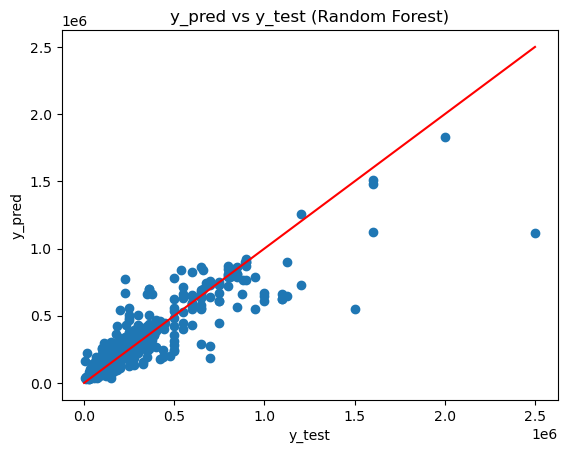

In [81]:
plt.figure()
plt.plot(np.linspace(0, max(y_test)), np.linspace(0, max(y_test)), color = 'red')
plt.scatter(y_test, y_pred_rf)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('y_pred vs y_test (Random Forest)')

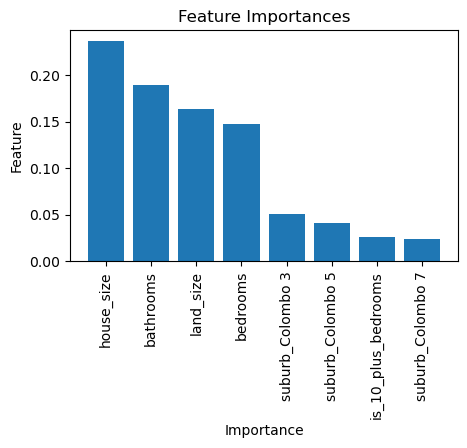

In [82]:
importances = model_rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(5, 3))
plt.bar(feature_importance_df['feature'].iloc[0:8], feature_importance_df['importance'].iloc[0:8])
plt.xlabel('Importance')
plt.xticks(rotation=90)
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

#### XGBoost

In [83]:
model_XGB = XGBRegressor(
    n_estimators=3000,
    learning_rate=0.01,
    max_depth=40,
    subsample=0.55,
    colsample_bytree=0.8,
    early_stopping_rounds=50,
    random_state=42
)

model_XGB.fit(x_train, y_train, 
          eval_set=[(x_test, y_test)], 
          verbose=True)


[0]	validation_0-rmse:266319.77680
[1]	validation_0-rmse:264558.12871
[2]	validation_0-rmse:262742.72305
[3]	validation_0-rmse:260976.36378
[4]	validation_0-rmse:259195.98309
[5]	validation_0-rmse:257697.89821
[6]	validation_0-rmse:256003.63760
[7]	validation_0-rmse:254127.57741
[8]	validation_0-rmse:252455.62075
[9]	validation_0-rmse:250862.53831
[10]	validation_0-rmse:249535.20378
[11]	validation_0-rmse:247980.90042
[12]	validation_0-rmse:246282.04962
[13]	validation_0-rmse:244721.00664
[14]	validation_0-rmse:243340.75377
[15]	validation_0-rmse:241686.37711
[16]	validation_0-rmse:240044.48125
[17]	validation_0-rmse:238908.29526
[18]	validation_0-rmse:237221.65629
[19]	validation_0-rmse:235607.02270
[20]	validation_0-rmse:234406.76448
[21]	validation_0-rmse:233018.11089
[22]	validation_0-rmse:231544.21731
[23]	validation_0-rmse:229990.66130
[24]	validation_0-rmse:228948.57019
[25]	validation_0-rmse:227566.10531
[26]	validation_0-rmse:226337.91848
[27]	validation_0-rmse:225050.88331
[2

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=40, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=3000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [84]:
y_pred_XGB = model_XGB.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_XGB))
r2 = r2_score(y_test, y_pred_XGB)

print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R^2 Score: {r2:.4f}')

Root Mean Squared Error (RMSE): 114876.9366
R^2 Score: 0.8164


Text(0.5, 1.0, 'y_pred vs y_test (XGBoost)')

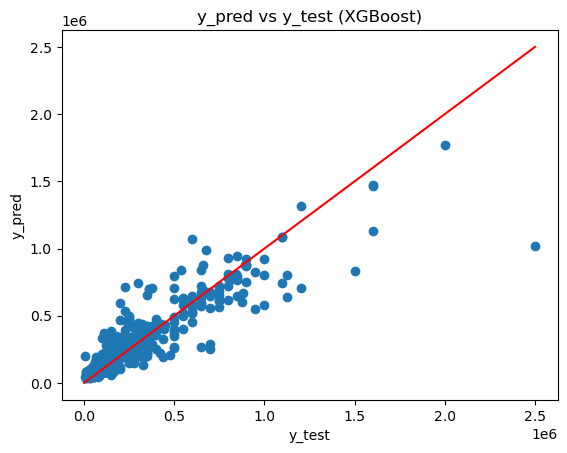

In [85]:
plt.figure()
plt.plot(np.linspace(0, max(y_test)), np.linspace(0, max(y_test)), color = 'red')
plt.scatter(y_test, y_pred_XGB)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('y_pred vs y_test (XGBoost)')

In [86]:
# Random Forest has a better score

model = model_rf

In [87]:
# Saving model

joblib.dump(model, "model.pkl")

['model.pkl']